<a href="https://colab.research.google.com/github/chacha091/ETC/blob/main/Task2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

# shirts.csv 파일을 데이터프레임으로 불러오기
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/비즈니스데이터분석/shirts.csv')

# 데이터의 샘플 5개를 출력
print("샘플 데이터:")
print(df.head())

# 데이터에 대한 기본 정보 출력 (컬럼, 결측값 등)
print("\n데이터 기본 정보:")
print(df.info())

# 데이터에 대한 통계 요약 출력 (수치형 변수에 대해)
print("\n통계 요약:")
print(df.describe())

샘플 데이터:
  Brand Name     Type  Size Brand Size  Chest(cm)  Front Length(cm)  \
0   Roadster   Cotton  38.0          S      100.3              73.7   
1   Roadster   Cotton  40.0          M      107.4              74.7   
2   Roadster   Cotton  42.0          L      115.1              74.7   
3   Roadster   Cotton  44.0         XL      122.7              76.5   
4   Roadster   Cotton  46.0        XXL      130.3              82.0   

   Across Shoulder(cm)  
0                 43.2  
1                 45.2  
2                 45.2  
3                 49.0  
4                 50.8  

데이터 기본 정보:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 834 entries, 0 to 833
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Brand Name           834 non-null    object 
 1   Type                 834 non-null    object 
 2   Size                 834 non-null    float64
 3   Brand Size           834 non-null    object 

In [ ]:
# 1-1. 범주형 변수 지정
categorical_cols = ['Brand Name', 'Type', 'Brand Size']
for col in categorical_cols:
    # 결측치를 고려하여 문자열로 변환 후, Categorical 타입 지정
    df[col] = df[col].astype(str).astype('category')

# 1-2. 수치형 변수 지정 (실제 치수 및 Size)
numeric_cols = ['Size', 'Chest(cm)', 'Front Length(cm)', 'Across Shoulder(cm)']
for col in numeric_cols:
    # 오류를 무시하고 변환 (변환할 수 없는 값은 NaN 처리)
    df[col] = pd.to_numeric(df[col], errors='coerce')

# 1-3. 최종 확인
print("[SUCCESS] 변수 타입 지정 완료")
print("\n--- 데이터프레임 정보 ---")
df.info()
print("\n통계 요약 (Numerical Variables):")
print(df[numeric_cols].describe())

[SUCCESS] 변수 타입 지정 완료

--- 데이터프레임 정보 ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 834 entries, 0 to 833
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   Brand Name           834 non-null    category
 1   Type                 834 non-null    category
 2   Size                 834 non-null    float64 
 3   Brand Size           834 non-null    category
 4   Chest(cm)            834 non-null    float64 
 5   Front Length(cm)     834 non-null    float64 
 6   Across Shoulder(cm)  829 non-null    float64 
dtypes: category(3), float64(4)
memory usage: 36.2 KB

통계 요약 (Numerical Variables):
             Size    Chest(cm)  Front Length(cm)  Across Shoulder(cm)
count  834.000000   834.000000        834.000000           829.000000
mean    42.104317   113.946763         76.115228            47.326538
std      3.736348    35.658632          5.146851             3.770188
min     33.000000    11.800000  

In [ ]:
print("[INFO] 결측치 확인 및 비율 계산 시작...")

# 결측치 개수 계산
missing_counts = df.isnull().sum()

# 결측치 비율 계산
total_rows = len(df)
missing_ratios = (missing_counts / total_rows) * 100

# 결측치가 0이 아닌 변수만 필터링
missing_info = pd.DataFrame({
    '결측치 개수': missing_counts,
    '결측치 비율 (%)': missing_ratios
})

# 결측치가 있는 행만 추출하고, 비율을 기준으로 내림차순 정렬
missing_info = missing_info[missing_info['결측치 개수'] > 0].sort_values(
    by='결측치 비율 (%)',
    ascending=False
)

if missing_info.empty:
    print("[SUCCESS] 데이터에 결측치가 없습니다.")
else:
    print("[SUCCESS] 결측치 확인 완료")
    print("\n--- 결측치 정보 (결측치 비율 내림차순) ---")
    display(missing_info.style.format({'결측치 개수': '{:,.0f}', '결측치 비율 (%)': '{:.2f}%'}))

[INFO] 결측치 확인 및 비율 계산 시작...
[SUCCESS] 결측치 확인 완료

--- 결측치 정보 (결측치 비율 내림차순) ---


,결측치 개수,결측치 비율 (%)
Across Shoulder(cm),5,0.60%


In [ ]:
#==========================================================
# 결측치 처리 (Across Shoulder 결측 행 삭제)
#==========================================================
print("\n[INFO] Across Shoulder 결측치 처리 시작...")

# 3-1. 결측치 처리 전 행 수 확인
rows_before = len(df)
print(f"[INFO] 결측치 처리 전 데이터 행 수: {rows_before}개")

# 3-2. 결측치가 있는 행 삭제 (DataFrame을 직접 수정)
df.dropna(subset=['Across Shoulder(cm)'], inplace=True)

# 3-3. 결측치 처리 후 행 수 확인
rows_after = len(df)
removed_count = rows_before - rows_after

print(f"[SUCCESS] Across Shoulder(cm) 결측치 포함 행 {removed_count}개 삭제 완료.")
print(f"[INFO] 최종 데이터 행 수: {rows_after}개")

#==========================================================
# 결측치 재확인
#==========================================================
print("\n[INFO] 결측치 재확인 중...")
if df.isnull().sum().sum() == 0:
    print("[SUCCESS] 모든 결측치가 제거되었음을 확인했습니다. 데이터 분석 준비 완료.")
else:
    # 혹시 다른 컬럼에 결측치가 남아있는지 확인
    remaining_missing = df.isnull().sum()
    remaining_missing = remaining_missing[remaining_missing > 0]
    print("[WARNING] 다른 컬럼에 결측치가 남아있을 수 있습니다:")
    display(remaining_missing)


[INFO] Across Shoulder 결측치 처리 시작...
[INFO] 결측치 처리 전 데이터 행 수: 834개
[SUCCESS] Across Shoulder(cm) 결측치 포함 행 5개 삭제 완료.
[INFO] 최종 데이터 행 수: 829개

[INFO] 결측치 재확인 중...
[SUCCESS] 모든 결측치가 제거되었음을 확인했습니다. 데이터 분석 준비 완료.


In [ ]:
# 나눔고딕 폰트 설치
!sudo apt-get update -qq
!sudo apt-get install -qq fonts-nanum

# matplotlib에 폰트 등록
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# 설치된 나눔고딕 경로 검색
font_path = "/usr/share/fonts/truetype/nanum/NanumGothic.ttf"

# 폰트 등록
fm.fontManager.addfont(font_path)

# matplotlib 기본 폰트 설정
plt.rc('font', family='NanumGothic')
plt.rcParams['axes.unicode_minus'] = False

W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)



[INFO] 수치형 변수별 박스플롯 시각화 시작...


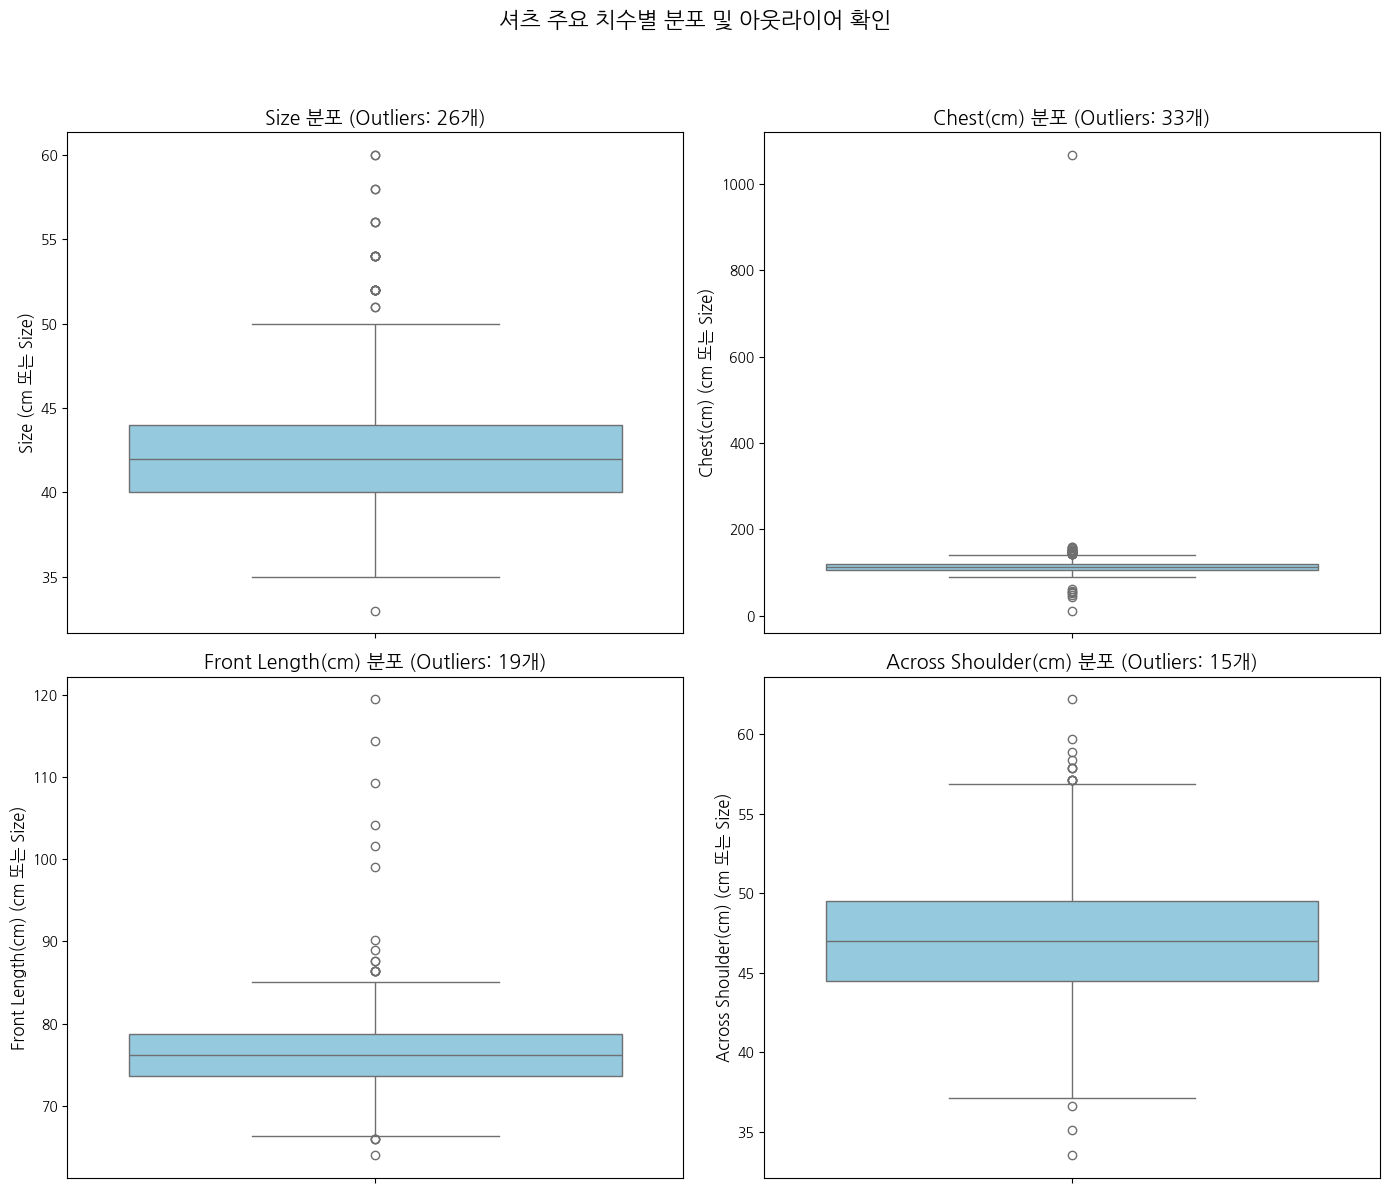

[SUCCESS] 박스플롯 시각화 완료.


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

#==========================================================
# 아웃라이어 시각화 (박스플롯)
#==========================================================
print("\n[INFO] 수치형 변수별 박스플롯 시각화 시작...")

# 서브플롯 생성 (2x2 레이아웃)
fig, axes = plt.subplots(2, 2, figsize=(14, 12))
axes = axes.flatten() # 1차원 배열로 평탄화

for i, col in enumerate(numeric_cols):
    # 박스 플롯 생성
    sns.boxplot(y=df[col], ax=axes[i], color='skyblue')

    # 아웃라이어 개수 계산 (IQR 기준)
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)][col]

    axes[i].set_title(f'{col} 분포 (Outliers: {len(outliers)}개)', fontsize=14)
    axes[i].set_ylabel(f'{col} (cm 또는 Size)', fontsize=12)

plt.suptitle("셔츠 주요 치수별 분포 및 아웃라이어 확인", fontsize=16, y=1.02)
plt.tight_layout(rect=[0, 0.03, 1, 0.98])
plt.show()

print("[SUCCESS] 박스플롯 시각화 완료.")

In [ ]:
import pandas as pd
import numpy as np

#==========================================================
# 1️⃣ IQR 기반 이상치 제거
#==========================================================
print("\n[INFO] IQR(Interquartile Range) 기반 이상치 제거 시작...")

df_cleaned = df.copy()
rows_before_outlier_removal = len(df_cleaned)
numeric_cols_to_clean = ['Size', 'Chest(cm)', 'Front Length(cm)', 'Across Shoulder(cm)']

# 각 수치형 변수별로 IQR 기준으로 이상치 제거
for col in numeric_cols_to_clean:
    Q1 = df_cleaned[col].quantile(0.25)
    Q3 = df_cleaned[col].quantile(0.75)
    IQR = Q3 - Q1
    # 1.5 * IQR 기준을 벗어나는 값 제거
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # 해당 컬럼의 이상치를 벗어난 행만 남기기 (누적 필터링)
    df_cleaned = df_cleaned[(df_cleaned[col] >= lower_bound) & (df_cleaned[col] <= upper_bound)]


rows_after_outlier_removal = len(df_cleaned)
total_removed_count = rows_before_outlier_removal - rows_after_outlier_removal

print(f"[SUCCESS] 모든 수치형 변수의 이상치 제거 완료.")
print(f"[INFO] 제거 전 총 행 수: {rows_before_outlier_removal}개")
print(f"🗑️ 총 제거된 이상치 행 수 (중복 포함): {total_removed_count}개")
print(f"[INFO] 최종 데이터 행 수: {rows_after_outlier_removal}개")

# 다음 분석을 위해 df를 최종 정리된 데이터프레임으로 갱신
df = df_cleaned
print("\n[INFO] 최종 정리된 데이터프레임 (df)의 상위 5개 행:")
display(df.head())


[INFO] IQR(Interquartile Range) 기반 이상치 제거 시작...
[SUCCESS] 모든 수치형 변수의 이상치 제거 완료.
[INFO] 제거 전 총 행 수: 829개
🗑️ 총 제거된 이상치 행 수 (중복 포함): 65개
[INFO] 최종 데이터 행 수: 764개

[INFO] 최종 정리된 데이터프레임 (df)의 상위 5개 행:


,Brand Name,Type,Size,Brand Size,Chest(cm),Front Length(cm),Across Shoulder(cm)
0,Roadster,Cotton,38.0,S,100.3,73.7,43.2
1,Roadster,Cotton,40.0,M,107.4,74.7,45.2
2,Roadster,Cotton,42.0,L,115.1,74.7,45.2
3,Roadster,Cotton,44.0,XL,122.7,76.5,49.0
4,Roadster,Cotton,46.0,XXL,130.3,82.0,50.8



[INFO] 수치형 변수별 박스플롯 시각화 시작...


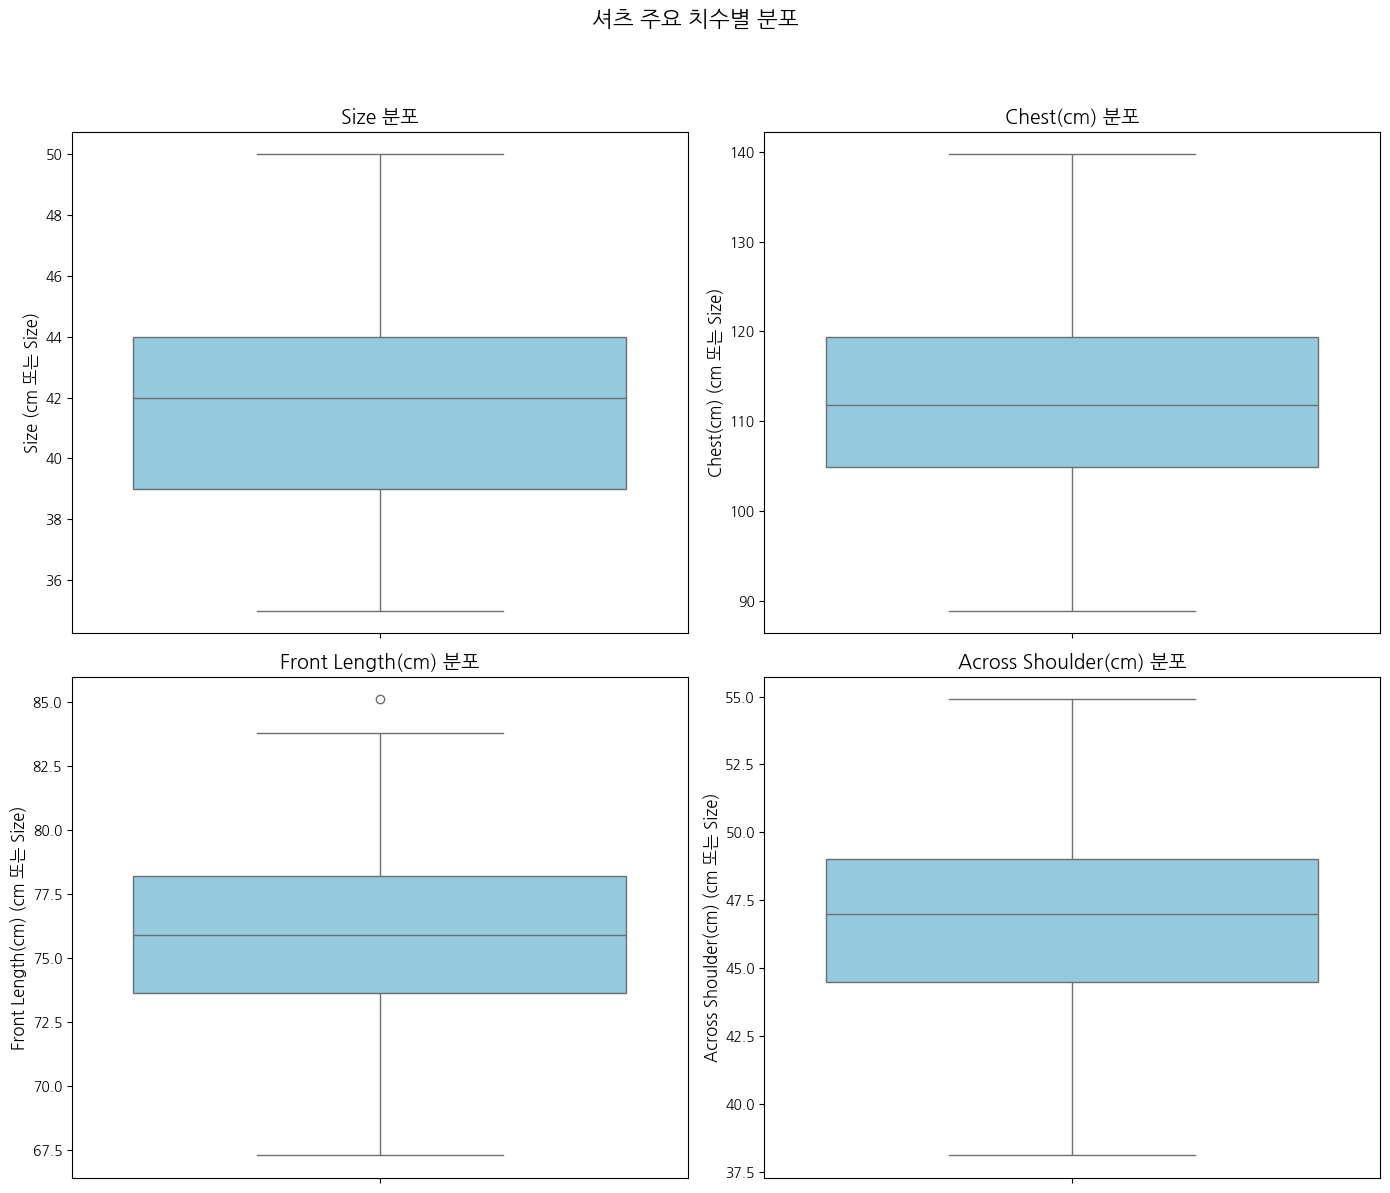

[SUCCESS] 박스플롯 시각화 완료.


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

#==========================================================
# 아웃라이어 시각화 (박스플롯)
#==========================================================
print("\n[INFO] 수치형 변수별 박스플롯 시각화 시작...")

# 서브플롯 생성 (2x2 레이아웃)
fig, axes = plt.subplots(2, 2, figsize=(14, 12))
axes = axes.flatten() # 1차원 배열로 평탄화

for i, col in enumerate(numeric_cols):
    # 박스 플롯 생성
    sns.boxplot(y=df[col], ax=axes[i], color='skyblue')

    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)][col]

    axes[i].set_title(f'{col} 분포', fontsize=14)
    axes[i].set_ylabel(f'{col} (cm 또는 Size)', fontsize=12)

plt.suptitle("셔츠 주요 치수별 분포", fontsize=16, y=1.02)
plt.tight_layout(rect=[0, 0.03, 1, 0.98])
plt.show()

print("[SUCCESS] 박스플롯 시각화 완료.")

In [ ]:
df = df.rename(columns={
    'Brand Name': 'BrandName',
    'Type': 'Type',
    'Size': 'Size',
    'Brand Size': 'BrandSize',
    'Chest(cm)': 'Chest',
    'Front Length(cm)': 'FrontLength',
    'Across Shoulder(cm)': 'AcrossShoulder'
})

print(df.columns)

Index(['BrandName', 'Type', 'Size', 'BrandSize', 'Chest', 'FrontLength',
       'AcrossShoulder'],
      dtype='object')


1. Shirt의 실제 치수는 동일한 Brand Size(S, M, L 등)라 하더라도 브랜드마다 차이가 있는가?

In [ ]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

# 분석 대상 치수 컬럼 정의 (Size 포함)
target_metrics = ['Size', 'Chest', 'FrontLength', 'AcrossShoulder']

print("\n[INFO] MANOVA 대신 개별 이원 분산 분석(ANOVA) 반복 시작...")

# 결과를 저장할 딕셔너리
anova_results_summary = {}

for metric in target_metrics:
    print(f"\n--- 📊 {metric}에 대한 ANOVA 분석 ---")

    # ANOVA 공식: 종속변수 ~ C(BrandSize) * C(BrandName)
    formula = f'{metric} ~ C(BrandSize) * C(BrandName)'

    try:
        model = ols(formula, data=df).fit()
        anova_table = sm.stats.anova_lm(model, typ=2)

        # BrandName 주 효과의 P-value 추출
        p_name = anova_table['PR(>F)']['C(BrandName)']
        anova_results_summary[metric] = p_name

        print(f"BrandName 주 효과 P-value: {p_name:.5f}")
        if p_name < 0.05:
            print("[결론] BrandName 주 효과: 유의미 (브랜드별 치수 평균 차이 존재)")
        else:
            print("[결론] BrandName 주 효과: 유의미하지 않음")

    except Exception as e:
        print(f"[ERROR] {metric} 분석 실패. (오류: {e})")

# 네 번의 분석을 완료한 후, 결과를 종합적으로 해석해야 합니다.


[INFO] MANOVA 대신 개별 이원 분산 분석(ANOVA) 반복 시작...

--- 📊 Size에 대한 ANOVA 분석 ---


/usr/local/lib/python3.12/dist-packages/statsmodels/base/model.py:1894: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 25, but rank is 5
  warnings.warn('covariance of constraints does not have full '
/usr/local/lib/python3.12/dist-packages/statsmodels/base/model.py:1894: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 160, but rank is 34
  warnings.warn('covariance of constraints does not have full '
/usr/local/lib/python3.12/dist-packages/statsmodels/base/model.py:1894: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 4000, but rank is 741
  warnings.warn('covariance of constraints does not have full '


BrandName 주 효과 P-value: 1.00000
[결론] BrandName 주 효과: 유의미하지 않음

--- 📊 Chest에 대한 ANOVA 분석 ---


/usr/local/lib/python3.12/dist-packages/statsmodels/base/model.py:1894: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 25, but rank is 5
  warnings.warn('covariance of constraints does not have full '
/usr/local/lib/python3.12/dist-packages/statsmodels/base/model.py:1894: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 160, but rank is 34
  warnings.warn('covariance of constraints does not have full '
/usr/local/lib/python3.12/dist-packages/statsmodels/base/model.py:1894: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 4000, but rank is 741
  warnings.warn('covariance of constraints does not have full '


BrandName 주 효과 P-value: 1.00000
[결론] BrandName 주 효과: 유의미하지 않음

--- 📊 FrontLength에 대한 ANOVA 분석 ---


/usr/local/lib/python3.12/dist-packages/statsmodels/base/model.py:1894: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 25, but rank is 5
  warnings.warn('covariance of constraints does not have full '
/usr/local/lib/python3.12/dist-packages/statsmodels/base/model.py:1894: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 160, but rank is 34
  warnings.warn('covariance of constraints does not have full '
/usr/local/lib/python3.12/dist-packages/statsmodels/base/model.py:1894: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 4000, but rank is 741
  warnings.warn('covariance of constraints does not have full '


BrandName 주 효과 P-value: 1.00000
[결론] BrandName 주 효과: 유의미하지 않음

--- 📊 AcrossShoulder에 대한 ANOVA 분석 ---


/usr/local/lib/python3.12/dist-packages/statsmodels/base/model.py:1894: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 25, but rank is 5
  warnings.warn('covariance of constraints does not have full '
/usr/local/lib/python3.12/dist-packages/statsmodels/base/model.py:1894: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 160, but rank is 34
  warnings.warn('covariance of constraints does not have full '


BrandName 주 효과 P-value: 1.00000
[결론] BrandName 주 효과: 유의미하지 않음


/usr/local/lib/python3.12/dist-packages/statsmodels/base/model.py:1894: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 4000, but rank is 741
  warnings.warn('covariance of constraints does not have full '


In [ ]:
import pandas as pd

df['BrandName'] = df['BrandName'].str.strip().str.title()

top10_brands = df['BrandName'].value_counts().head(10).index
df_top = df[df['BrandName'].isin(top10_brands)].copy()

print("df_top shape:", df_top.shape)
print("unique brands:", df_top['BrandName'].nunique())
print(df_top['BrandName'].value_counts())


df_top shape: (71, 7)
unique brands: 10
BrandName
Wrogn                    10
English Navy              8
Harvard                   8
Drean Of Glory Inc        7
Peter England             7
Arrow Sport               7
Roadster                  6
Wild West                 6
Van Heusen Denim Labs     6
Tisbtane                  6
Name: count, dtype: int64


In [ ]:
target_metrics = ['Size', 'Chest', 'FrontLength', 'AcrossShoulder']
anova_results_summary = {}

print("\n[INFO] 상위 10개 브랜드 데이터로 ANOVA 재실행 시작...")

for metric in target_metrics:
    print(f"\n--- 📊 {metric}에 대한 ANOVA 분석 (Top 10 Brands) ---")

    # ANOVA 공식: 종속변수 ~ C(BrandSize) * C(BrandName)
    formula = f'{metric} ~ C(BrandSize) * C(BrandName)'

    try:
        # 필터링된 df_top 데이터 사용
        model = ols(formula, data=df_top).fit()
        anova_table = sm.stats.anova_lm(model, typ=2)

        # BrandName 주 효과의 P-value 추출
        p_name = anova_table['PR(>F)']['C(BrandName)']
        anova_results_summary[metric] = p_name

        # Bonferroni 교정 (0.0125) 적용하여 최종 결론 도출
        alpha_new = 0.05 / len(target_metrics) # 0.05 / 4 = 0.0125

        print(f"BrandName 주 효과 P-value: {p_name:.5f}")

        if p_name < alpha_new:
            print(f"[✅ 결론] Bonferroni 교정 기준(P < {alpha_new:.4f}) 유의미한 차이 존재.")
        else:
            print(f"[❌ 결론] Bon정리 교정 기준 유의미한 차이 없음.")

    except Exception as e:
        print(f"[ERROR] {metric} 분석 실패. (오류: {e})")

print("\n[SUCCESS] 상위 10개 브랜드에 대한 ANOVA 재실행 및 Bonferroni 교정 완료.")


[INFO] 상위 10개 브랜드 데이터로 ANOVA 재실행 시작...

--- 📊 Size에 대한 ANOVA 분석 (Top 10 Brands) ---
BrandName 주 효과 P-value: 0.00000
[✅ 결론] Bonferroni 교정 기준(P < 0.0125) 유의미한 차이 존재.

--- 📊 Chest에 대한 ANOVA 분석 (Top 10 Brands) ---
BrandName 주 효과 P-value: 1.00000
[❌ 결론] Bon정리 교정 기준 유의미한 차이 없음.

--- 📊 FrontLength에 대한 ANOVA 분석 (Top 10 Brands) ---


/usr/local/lib/python3.12/dist-packages/statsmodels/base/model.py:1894: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 25, but rank is 5
  warnings.warn('covariance of constraints does not have full '
/usr/local/lib/python3.12/dist-packages/statsmodels/base/model.py:1894: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 9, but rank is 2
  warnings.warn('covariance of constraints does not have full '
/usr/local/lib/python3.12/dist-packages/statsmodels/base/model.py:1894: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 225, but rank is 51
  warnings.warn('covariance of constraints does not have full '
/usr/local/lib/python3.12/dist-packages/statsmodels/base/model.py:1894: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 25, but rank is 5
  warnings.warn('covariance of constraints does not have full '
/usr/lo

BrandName 주 효과 P-value: 1.00000
[❌ 결론] Bon정리 교정 기준 유의미한 차이 없음.

--- 📊 AcrossShoulder에 대한 ANOVA 분석 (Top 10 Brands) ---
BrandName 주 효과 P-value: 1.00000
[❌ 결론] Bon정리 교정 기준 유의미한 차이 없음.

[SUCCESS] 상위 10개 브랜드에 대한 ANOVA 재실행 및 Bonferroni 교정 완료.


/usr/local/lib/python3.12/dist-packages/statsmodels/base/model.py:1894: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 25, but rank is 5
  warnings.warn('covariance of constraints does not have full '
/usr/local/lib/python3.12/dist-packages/statsmodels/base/model.py:1894: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 9, but rank is 2
  warnings.warn('covariance of constraints does not have full '
/usr/local/lib/python3.12/dist-packages/statsmodels/base/model.py:1894: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 225, but rank is 51
  warnings.warn('covariance of constraints does not have full '
/usr/local/lib/python3.12/dist-packages/statsmodels/base/model.py:1894: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 25, but rank is 5
  warnings.warn('covariance of constraints does not have full '
/usr/lo

[INFO] Kruskal-Wallis H 검정을 위한 데이터 준비 시작 (Brand Size 필터 해제)...
[SUCCESS] 103개 유효 브랜드 준비 완료. (총 556개 샘플)

[INFO] 크러스컬-월리스 H 검정 (전체 사이즈) 시작...

--- 📊 Size에 대한 Kruskal-Wallis H 검정 ---
H-statistic: 52.927, P-value: 0.99999
[❌ 결론] P >= 0.05. 브랜드별 중앙값에 유의미한 차이가 없습니다.


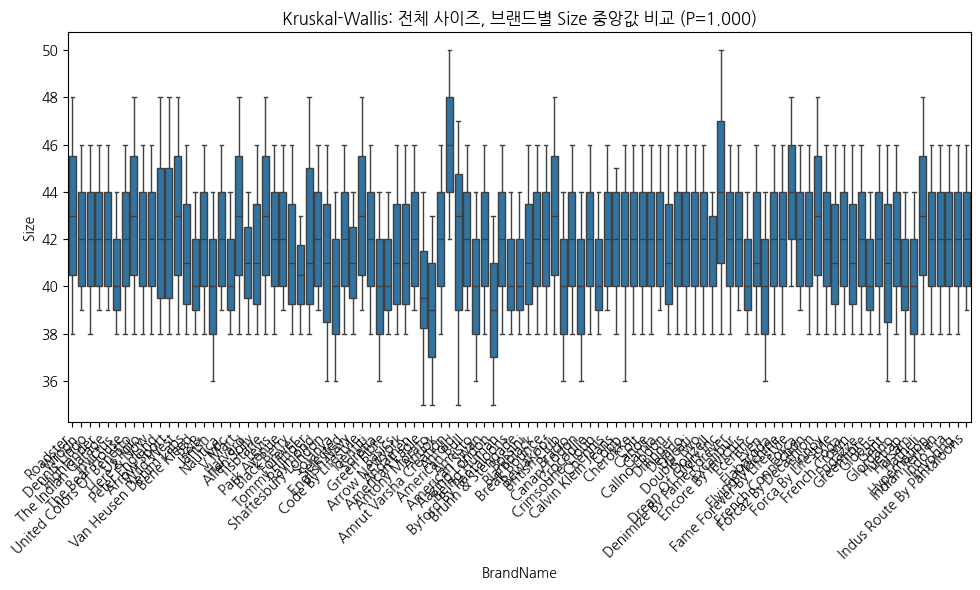


--- 📊 Chest에 대한 Kruskal-Wallis H 검정 ---
H-statistic: 106.652, P-value: 0.35666
[❌ 결론] P >= 0.05. 브랜드별 중앙값에 유의미한 차이가 없습니다.


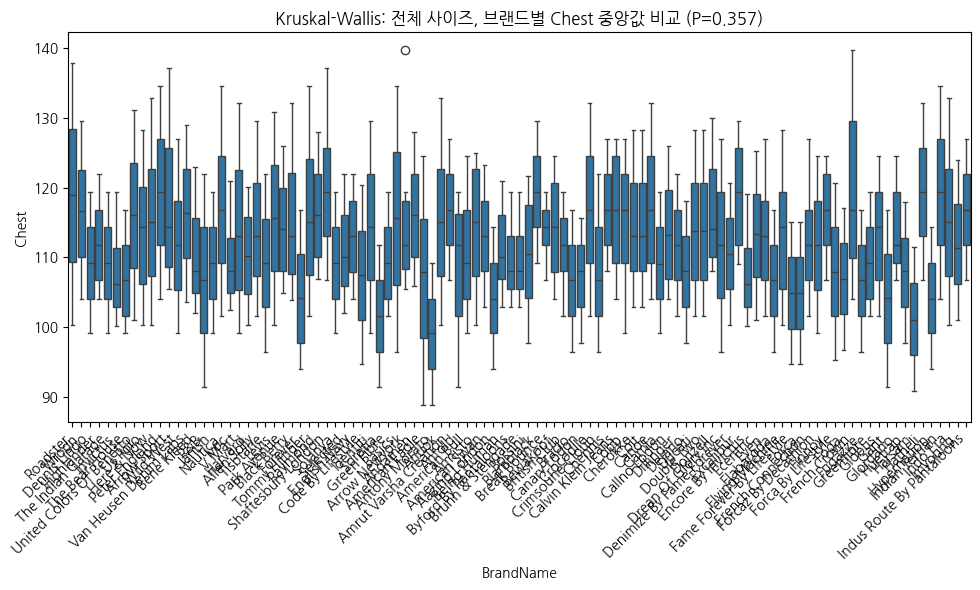


--- 📊 FrontLength에 대한 Kruskal-Wallis H 검정 ---
H-statistic: 245.733, P-value: 0.00000
[✅ 결론] P < 0.05. 사이즈에 관계없이 브랜드별 중앙값에 유의미한 차이가 존재합니다.


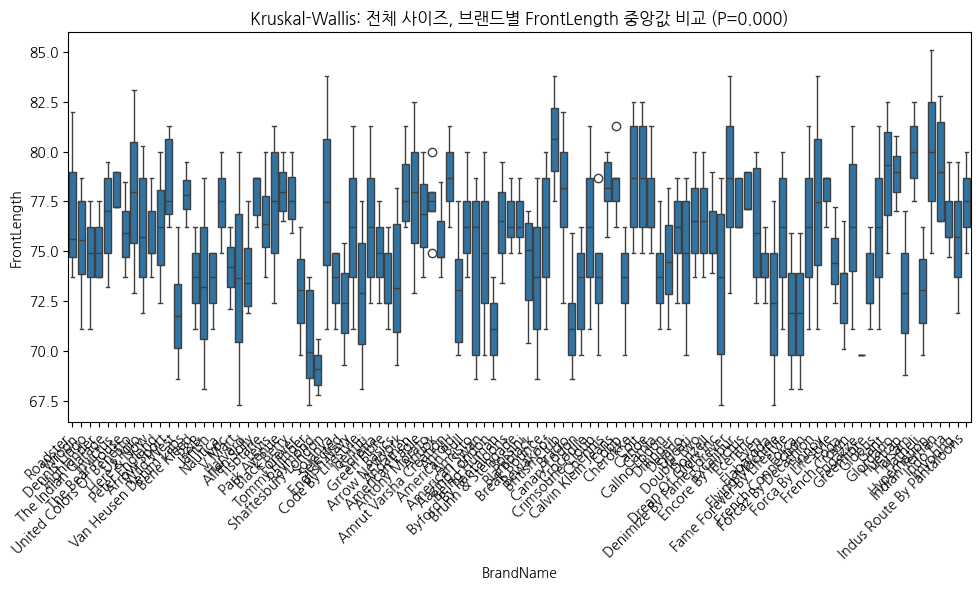


--- 📊 AcrossShoulder에 대한 Kruskal-Wallis H 검정 ---
H-statistic: 85.033, P-value: 0.88755
[❌ 결론] P >= 0.05. 브랜드별 중앙값에 유의미한 차이가 없습니다.


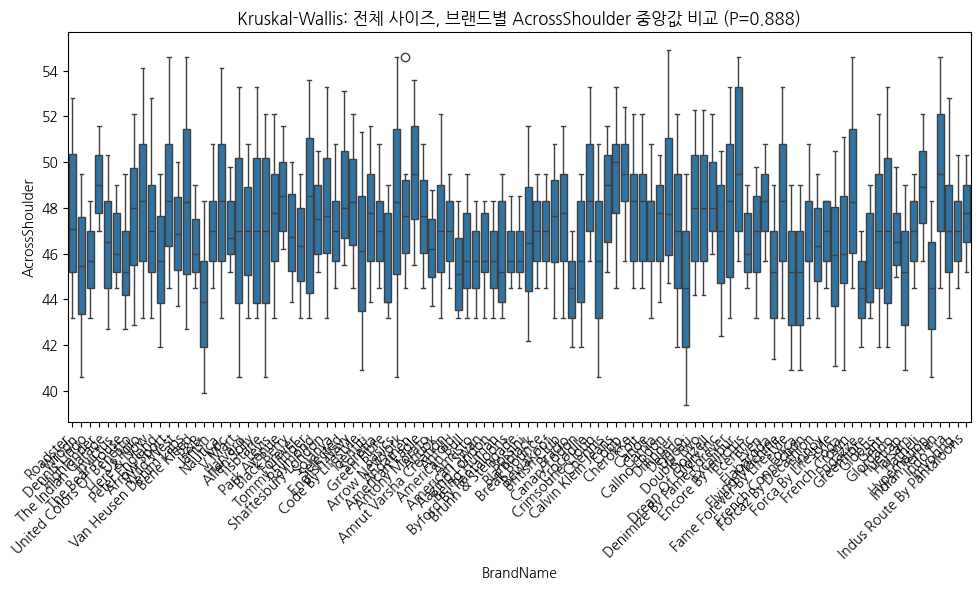

In [ ]:
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

#==========================================================
# 1️⃣ 데이터 준비: Brand Size 필터링 해제
#==========================================================
print("[INFO] Kruskal-Wallis H 검정을 위한 데이터 준비 시작 (Brand Size 필터 해제)...")

# 이상치 제거 후의 최종 데이터프레임 (df) 사용
df_kruskal_all = df.copy()

# 검정에 참여할 브랜드 리스트 (5개 미만인 브랜드 제외)
valid_brands = df_kruskal_all['BrandName'].value_counts()
valid_brands = valid_brands[valid_brands >= 5].index.tolist()
df_kruskal_all = df_kruskal_all[df_kruskal_all['BrandName'].isin(valid_brands)]

print(f"[SUCCESS] {len(valid_brands)}개 유효 브랜드 준비 완료. (총 {len(df_kruskal_all)}개 샘플)")

#==========================================================
# 2️⃣ Kruskal-Wallis H 검정 수행 및 시각화
#==========================================================
target_metrics = ['Size', 'Chest', 'FrontLength', 'AcrossShoulder']
print("\n[INFO] 크러스컬-월리스 H 검정 (전체 사이즈) 시작...")

for metric in target_metrics:
    # 각 브랜드별 종속 변수 데이터를 리스트로 묶기
    brand_data_list = [
        df_kruskal_all[df_kruskal_all['BrandName'] == brand][metric].dropna().values
        for brand in valid_brands
    ]

    # 검정 수행
    if all(len(data) > 0 for data in brand_data_list) and len(brand_data_list) >= 2:
        # 데이터가 충분하면 검정 수행
        H_stat, p_value = stats.kruskal(*brand_data_list)

        print(f"\n--- 📊 {metric}에 대한 Kruskal-Wallis H 검정 ---")
        print(f"H-statistic: {H_stat:.3f}, P-value: {p_value:.5f}")

        if p_value < 0.05:
            print("[✅ 결론] P < 0.05. 사이즈에 관계없이 브랜드별 중앙값에 유의미한 차이가 존재합니다.")
        else:
            print("[❌ 결론] P >= 0.05. 브랜드별 중앙값에 유의미한 차이가 없습니다.")

        # 시각화: 박스 플롯 (중앙값 비교 시 가장 적합)
        plt.figure(figsize=(10, 6))
        sns.boxplot(x='BrandName', y=metric, data=df_kruskal_all)
        plt.title(f'Kruskal-Wallis: 전체 사이즈, 브랜드별 {metric} 중앙값 비교 (P={p_value:.3f})')
        plt.xticks(rotation=45, ha='right')
        plt.tight_layout()
        plt.show()
    else:
        print(f"\n[SKIP] {metric} 분석: 검정을 위한 데이터가 부족합니다.")

2. Shirt의 소재(Type)가 실제 치수에 영향을 주는가?


[INFO] 질문 2 분석: Kruskal-Wallis H 검정을 위한 데이터 준비 시작...
[SUCCESS] 3개 유효 소재(Type) 준비 완료. (총 764개 샘플)

[INFO] 크러스컬-월리스 H 검정 (소재 Type) 시작...

--- 📊 Size에 대한 Kruskal-Wallis H 검정 (Type별) ---
H-statistic: 1.782, P-value: 0.41021
[❌ 결론] P >= 0.05. 소재(Type)별 중앙값에 유의미한 차이가 없습니다.


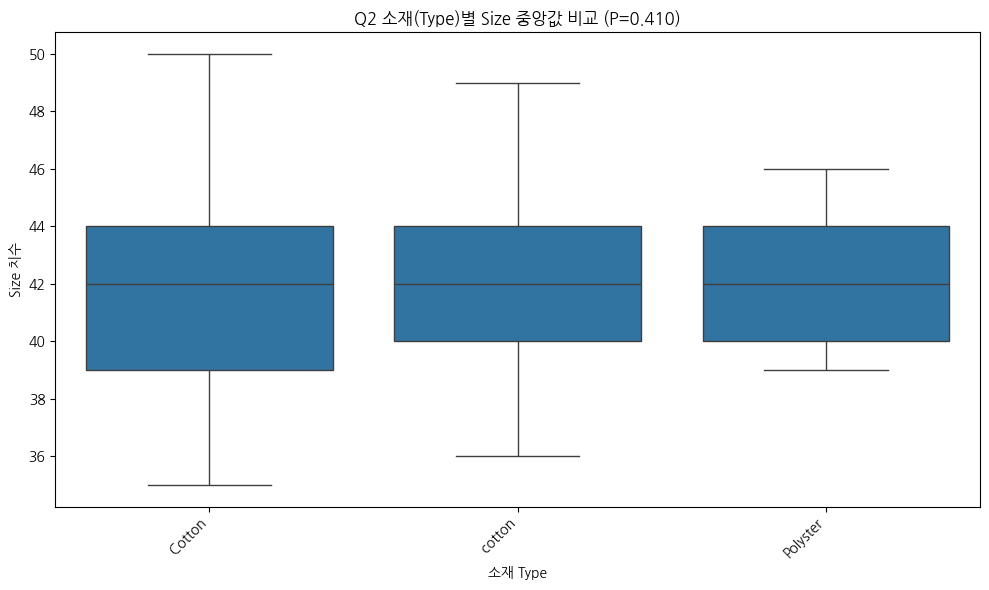


--- 📊 Chest에 대한 Kruskal-Wallis H 검정 (Type별) ---
H-statistic: 3.551, P-value: 0.16943
[❌ 결론] P >= 0.05. 소재(Type)별 중앙값에 유의미한 차이가 없습니다.


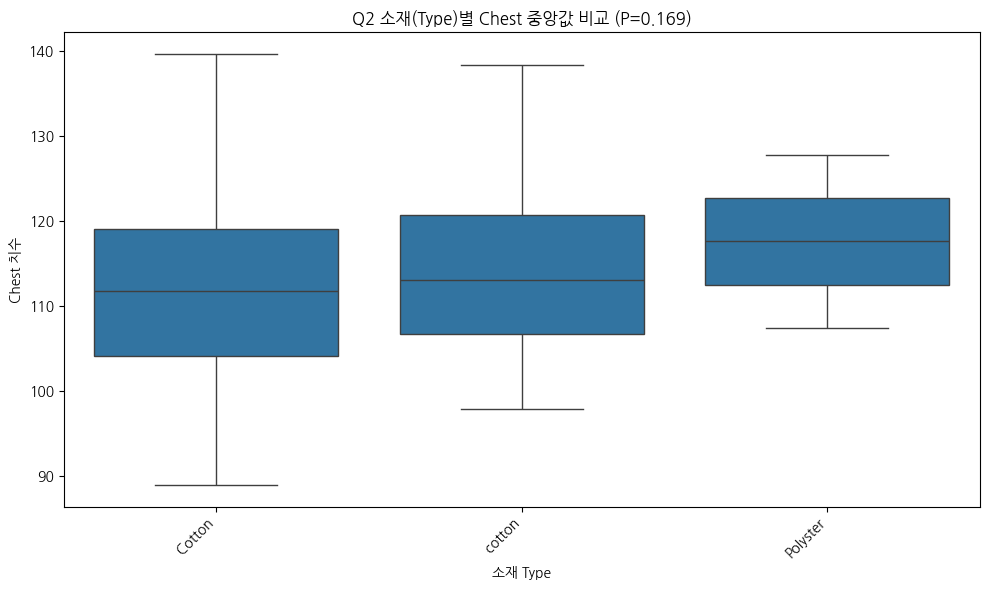


--- 📊 FrontLength에 대한 Kruskal-Wallis H 검정 (Type별) ---
H-statistic: 3.371, P-value: 0.18538
[❌ 결론] P >= 0.05. 소재(Type)별 중앙값에 유의미한 차이가 없습니다.


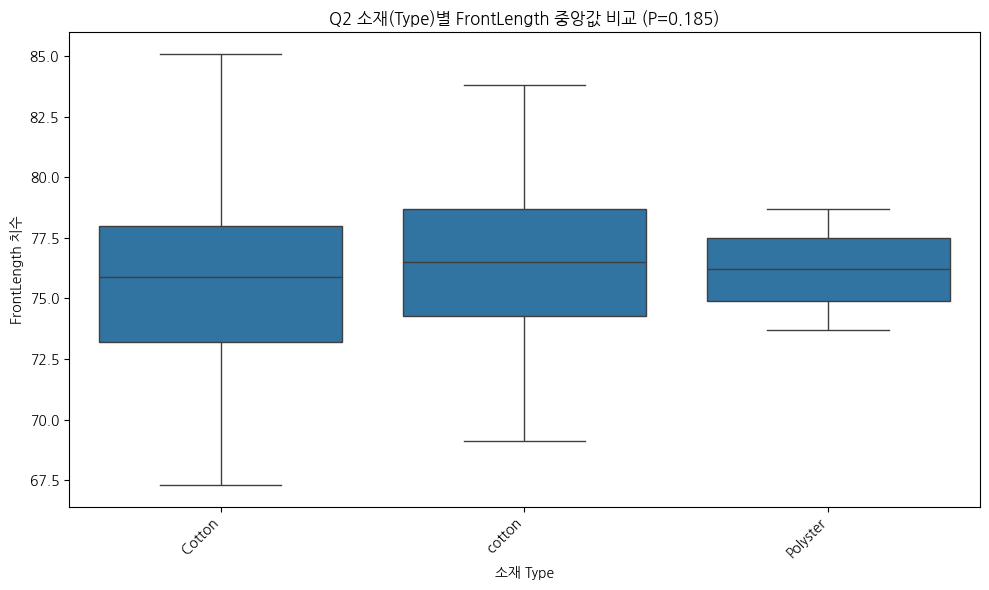


--- 📊 AcrossShoulder에 대한 Kruskal-Wallis H 검정 (Type별) ---
H-statistic: 1.882, P-value: 0.39021
[❌ 결론] P >= 0.05. 소재(Type)별 중앙값에 유의미한 차이가 없습니다.


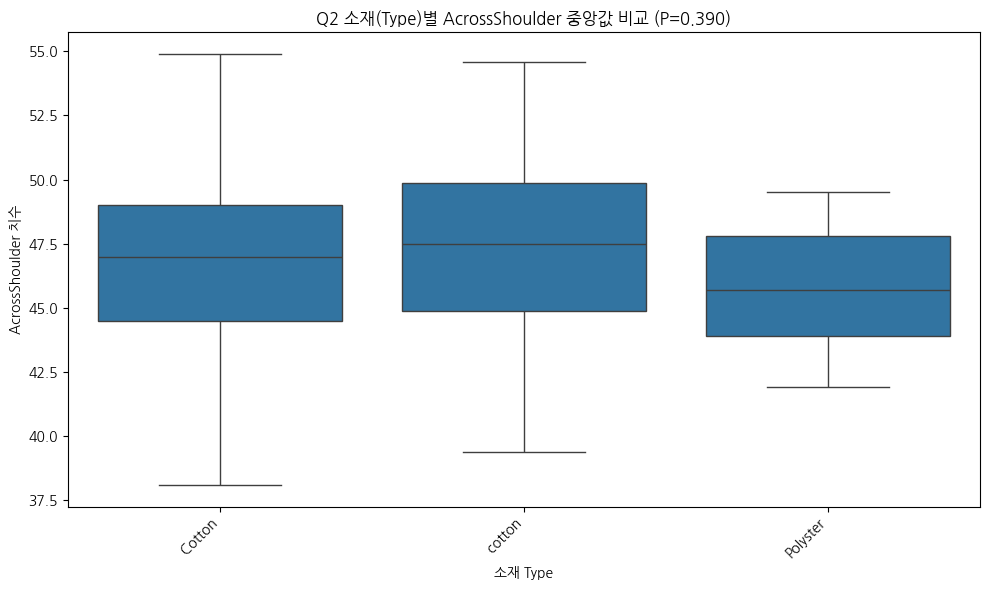

In [ ]:
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

#==========================================================
# 1️⃣ 데이터 준비: 유효한 Type 그룹만 필터링
#==========================================================
# 이전 단계에서 이상치 및 일부 희소 브랜드를 제거한 df를 사용합니다.
df_kruskal_type = df.copy()

print("\n[INFO] 질문 2 분석: Kruskal-Wallis H 검정을 위한 데이터 준비 시작...")

# 검정에 참여할 소재(Type) 리스트 (샘플 수가 5개 미만인 Type 제외)
# 소재 유형이 너무 적으면 통계적 검정력이 낮아지므로, 최소 샘플 수 5를 기준으로 필터링합니다.
valid_types = df_kruskal_type['Type'].value_counts()
valid_types = valid_types[valid_types >= 5].index.tolist()
df_kruskal_type = df_kruskal_type[df_kruskal_type['Type'].isin(valid_types)]

print(f"[SUCCESS] {len(valid_types)}개 유효 소재(Type) 준비 완료. (총 {len(df_kruskal_type)}개 샘플)")

#==========================================================
# 2️⃣ 크러스컬-월리스 H 검정 수행 및 시각화
#==========================================================
target_metrics = ['Size', 'Chest', 'FrontLength', 'AcrossShoulder']
print("\n[INFO] 크러스컬-월리스 H 검정 (소재 Type) 시작...")

for metric in target_metrics:
    # 각 소재(Type)별 종속 변수 데이터를 리스트로 묶기
    type_data_list = [
        df_kruskal_type[df_kruskal_type['Type'] == t][metric].dropna().values
        for t in valid_types
    ]

    # 검정 수행
    if all(len(data) > 0 for data in type_data_list) and len(type_data_list) >= 2:
        H_stat, p_value = stats.kruskal(*type_data_list)

        print(f"\n--- 📊 {metric}에 대한 Kruskal-Wallis H 검정 (Type별) ---")
        print(f"H-statistic: {H_stat:.3f}, P-value: {p_value:.5f}")

        if p_value < 0.05:
            print("[✅ 결론] P < 0.05. 소재(Type)별 중앙값에 유의미한 차이가 존재합니다.")
        else:
            print("[❌ 결론] P >= 0.05. 소재(Type)별 중앙값에 유의미한 차이가 없습니다.")

        # 시각화: 박스 플롯 (중앙값 비교 시 가장 적합)
        plt.figure(figsize=(10, 6))
        sns.boxplot(x='Type', y=metric, data=df_kruskal_type)
        plt.title(f'Q2 소재(Type)별 {metric} 중앙값 비교 (P={p_value:.3f})')
        plt.xlabel('소재 Type')
        plt.ylabel(f'{metric} 치수')
        plt.xticks(rotation=45, ha='right')
        plt.tight_layout()
        plt.show()
    else:
        print(f"\n[SKIP] {metric} 분석: 검정을 위한 데이터가 부족합니다.")

3. 서로 다른 두 브랜드를 선택했을 때, 동일 Brand Size 기준으로 실제 치수에 차이가 있는가?


[INFO] 질문 3 분석: 랜덤 포레스트 모델 준비 시작...
[ERROR] 데이터 부족: 선택된 두 브랜드의 총 샘플 수가 50개 미만입니다 (17개). 분석을 건너뜁니다.
[SUCCESS] 무작위 선택된 비교 대상: 'Wrogn'와 'Peter England'
[INFO] 모델 학습에 사용될 총 샘플 수: 17개

[INFO] 랜덤 포레스트 분류 모델 학습 시작...
[SUCCESS] 랜덤 포레스트 모델 학습 및 평가 완료.
**테스트 데이터 분류 정확도: 0.1667**

--- 📊 결과 해석 ---
[❌ 결론] 정확도가 0.17로 낮습니다. 두 브랜드의 치수 분포가 유사하여 치수만으로 브랜드를 구별하기 어렵습니다.

--- 특징 중요도 (어떤 치수가 브랜드를 구별하는 데 중요한가?) ---


,0
Chest,0.443109
AcrossShoulder,0.261117
FrontLength,0.156399
Size,0.139375


/tmp/ipython-input-1635402898.py:82: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importances.index, y=feature_importances.values, palette="viridis")


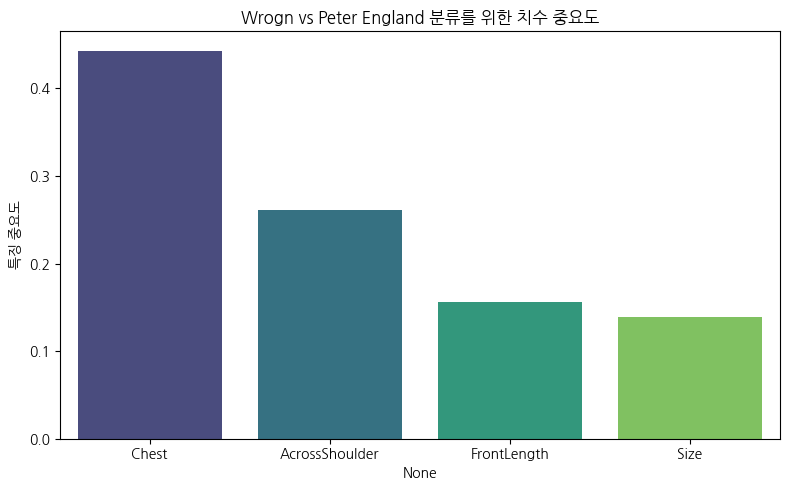

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import random

#==========================================================
# 1️⃣ 데이터 준비: 무작위 두 브랜드 선정 (안정성을 위해 상위 5개 후보)
#==========================================================
print("\n[INFO] 질문 3 분석: 랜덤 포레스트 모델 준비 시작...")

# 데이터가 많은 상위 5개 브랜드만 무작위 추출 후보로 선정하여 희소성 문제 최소화
brand_counts = df['BrandName'].value_counts()
valid_brands = brand_counts.nlargest(5).index.tolist()

if len(valid_brands) < 2:
    print("[ERROR] 분석 가능한 브랜드가 2개 미만입니다. 분석 불가.")
    exit()

# 무작위로 서로 다른 두 브랜드 선택
selected_brands = random.sample(valid_brands, 2)
brand_a = selected_brands[0]
brand_b = selected_brands[1]

# 두 브랜드의 데이터만 필터링
df_2_brands = df[df['BrandName'].isin([brand_a, brand_b])].copy()

# 공통 사이즈 필터링 대신, 두 브랜드가 가진 모든 사이즈 데이터를 활용하여 모델을 학습합니다.
# (단일 사이즈 비교보다 더 많은 데이터를 활용하여 안정성을 높입니다.)

# Feature (치수)와 Target (브랜드) 설정
features = ['Size', 'Chest', 'FrontLength', 'AcrossShoulder']
X = df_2_brands[features].dropna() # 결측치 있는 행 제거
y = df_2_brands.loc[X.index, 'BrandName'] # X와 y의 인덱스 일치

if len(X) < 50:
    print(f"[ERROR] 데이터 부족: 선택된 두 브랜드의 총 샘플 수가 50개 미만입니다 ({len(X)}개). 분석을 건너뜁니다.")
    exit()

print(f"[SUCCESS] 무작위 선택된 비교 대상: '{brand_a}'와 '{brand_b}'")
print(f"[INFO] 모델 학습에 사용될 총 샘플 수: {len(X)}개")

#==========================================================
# 2️⃣ 랜덤 포레스트 모델 학습 및 평가
#==========================================================
print("\n[INFO] 랜덤 포레스트 분류 모델 학습 시작...")

# 학습/테스트 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# 모델 초기화 및 학습
rf_model = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
rf_model.fit(X_train, y_train)

# 예측 및 정확도 평가
y_pred = rf_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print("[SUCCESS] 랜덤 포레스트 모델 학습 및 평가 완료.")
print(f"**테스트 데이터 분류 정확도: {accuracy:.4f}**")

#==========================================================
# 3️⃣ 결과 해석 및 특징 중요도 확인
#==========================================================
print("\n--- 📊 결과 해석 ---")
if accuracy > 0.8:
    print(f"[✅ 결론] 정확도가 {accuracy:.2f}로 매우 높습니다. 치수만으로 두 브랜드를 뚜렷하게 구별할 수 있으며, 이는 동일 사이즈 치수 분포에 유의미한 차이가 있음을 강력하게 시사합니다.")
elif accuracy > 0.6:
    print(f"[⚠️ 결론] 정확도가 {accuracy:.2f}로 보통 수준입니다. 치수 분포에 어느 정도 차이는 있지만 명확하게 구별되지는 않습니다.")
else:
    print(f"[❌ 결론] 정확도가 {accuracy:.2f}로 낮습니다. 두 브랜드의 치수 분포가 유사하여 치수만으로 브랜드를 구별하기 어렵습니다.")

print("\n--- 특징 중요도 (어떤 치수가 브랜드를 구별하는 데 중요한가?) ---")
feature_importances = pd.Series(rf_model.feature_importances_, index=features).sort_values(ascending=False)
display(feature_importances)

# 특징 중요도 시각화
plt.figure(figsize=(8, 5))
sns.barplot(x=feature_importances.index, y=feature_importances.values, palette="viridis")
plt.title(f'{brand_a} vs {brand_b} 분류를 위한 치수 중요도')
plt.ylabel('특징 중요도')
plt.tight_layout()
plt.show()

In [ ]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import random

#==========================================================
# 1️⃣ 데이터 준비: 가장 안정적인 브랜드 쌍 선정
#==========================================================
print("\n[INFO] 최종 분석 재시도: 데이터가 가장 많은 상위 2개 브랜드를 강제 선정합니다.")

# 데이터 수가 가장 많은 상위 2개 브랜드 선택 (무작위성 제거, 안정성 우선)
brand_counts = df['BrandName'].value_counts()
selected_brands = brand_counts.nlargest(2).index.tolist()

brand_a = selected_brands[0]
brand_b = selected_brands[1]

# 두 브랜드의 데이터만 필터링
df_2_brands = df[df['BrandName'].isin([brand_a, brand_b])].copy()

# 두 브랜드가 모두 가지고 있는 Brand Size 목록 추출
common_sizes = df_2_brands.groupby('BrandSize')['BrandName'].nunique()
sizes_to_test = common_sizes[common_sizes == 2].index.tolist()

print(f"[SUCCESS] 강제 선택된 비교 대상 (데이터 최다): '{brand_a}'와 '{brand_b}'")
print(f"[INFO] 비교할 공통 사이즈: {sizes_to_test}")

# 결과를 저장할 리스트
summary_results = []
target_metrics = ['Size', 'Chest', 'FrontLength', 'AcrossShoulder']

#==========================================================
# 2️⃣ 맨-휘트니 U 검정 반복 수행
#==========================================================
print("\n[INFO] 사이즈별 맨-휘트니 U 검정 반복 수행 시작...")

for size in sizes_to_test:
    df_size = df_2_brands[df_2_brands['BrandSize'] == size]

    for metric in target_metrics:
        data_a = df_size[df_size['BrandName'] == brand_a][metric].dropna()
        data_b = df_size[df_size['BrandName'] == brand_b][metric].dropna()

        # 샘플 수가 2개 미만인 경우 건너뛰기
        if len(data_a) < 2 or len(data_b) < 2:
             summary_results.append({
                 'BrandSize': size, 'Metric': metric, 'Result': 'SKIP (샘플 2개 미만)',
                 'P_Value': np.nan, 'BrandA_N': len(data_a), 'BrandB_N': len(data_b)
             })
             continue

        # 맨-휘트니 U 검정 수행
        u_stat, p_value = stats.mannwhitneyu(data_a, data_b, alternative='two-sided')

        result = "유의미한 차이 존재" if p_value < 0.05 else "유의미한 차이 없음"

        summary_results.append({
            'BrandSize': size,
            'Metric': metric,
            'P_Value': p_value,
            'Result': result,
            'BrandA_N': len(data_a),
            'BrandB_N': len(data_b)
        })

print("[SUCCESS] 최종 맨-휘트니 U 검정 완료.")

#==========================================================
# 3️⃣ 결과 정리 및 출력
#==========================================================
results_df = pd.DataFrame(summary_results)

print(f"\n--- 📊 최종 분석: '{brand_a}' vs '{brand_b}' 치수 비교 결과 (사이즈별) ---")
display(results_df.style.format({'P_Value': '{:.5f}'}))

# 유의미한 차이가 있는 경우 시각화
for metric in target_metrics:
    df_diff = results_df[(results_df['Metric'] == metric) & (results_df['Result'] == '유의미한 차이 존재')]

    if not df_diff.empty:
        sizes_to_plot = df_diff['BrandSize'].tolist()
        df_plot = df_2_brands[df_2_brands['BrandSize'].isin(sizes_to_plot)]

        plt.figure(figsize=(10, 6))
        sns.boxplot(
            x='BrandSize',
            y=metric,
            hue='BrandName',
            data=df_plot,
            palette=['skyblue', 'lightcoral']
        )
        plt.title(f'최종 비교: {brand_a} vs {brand_b} {metric} 중앙값 비교', fontsize=14)
        plt.xlabel('Brand Size')
        plt.ylabel(f'{metric} 중앙값')
        plt.tight_layout()
        plt.show()


[INFO] 최종 분석 재시도: 데이터가 가장 많은 상위 2개 브랜드를 강제 선정합니다.
[SUCCESS] 강제 선택된 비교 대상 (데이터 최다): 'WROGN'와 'English Navy'
[INFO] 비교할 공통 사이즈: ['L', 'M', 'S', 'XL']

[INFO] 사이즈별 맨-휘트니 U 검정 반복 수행 시작...
[SUCCESS] 최종 맨-휘트니 U 검정 완료.

--- 📊 최종 분석: 'WROGN' vs 'English Navy' 치수 비교 결과 (사이즈별) ---


/tmp/ipython-input-1004043225.py:24: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  common_sizes = df_2_brands.groupby('BrandSize')['BrandName'].nunique()


,BrandSize,Metric,P_Value,Result,BrandA_N,BrandB_N
0,L,Size,1.00000,유의미한 차이 없음,2,2
1,L,Chest,1.00000,유의미한 차이 없음,2,2
2,L,FrontLength,0.41422,유의미한 차이 없음,2,2
3,L,AcrossShoulder,0.22067,유의미한 차이 없음,2,2
4,M,Size,1.00000,유의미한 차이 없음,2,2
5,M,Chest,0.61708,유의미한 차이 없음,2,2
6,M,FrontLength,1.00000,유의미한 차이 없음,2,2
7,M,AcrossShoulder,0.22067,유의미한 차이 없음,2,2
8,S,Size,0.19393,유의미한 차이 없음,2,2
9,S,Chest,0.61708,유의미한 차이 없음,2,2
